# Auto MPG Exploratory Data Analysis

## Author: Maria Ingold

UoEO Machine Learning
Assignment Date: 5 November, 2024

## Assignment: EDA with Auto-mpg dataset

* Identify missing values.
* Estimate Skewness and Kurtosis.
* Correlation Heat Map.
* Scatter plot for different parameters.
* Replace categorical values with numerical values (i.e., America 1, Europe 2 etc.).

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
!pip install scikit-learn
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

## Import Data

***Manually upload file into Session Storage in Google Colab***




## Read Data

In [4]:
auto_mpg = pd.read_csv("2_auto-mpg.csv")

## Basic Descriptions
### 5-Figure Summary per column

In [5]:
auto_mpg.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Now that you have got a general idea about your data set, it’s also a good idea to take a closer look at the data itself. With the help of the head() and tail() functions of the Pandas library, you can easily check out the first and last lines of your DataFrame, respectively.

Let us look at some sample data

In [6]:
auto_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [7]:
auto_mpg.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


Shape shows the dimensionality of the data frame in (rows, columns).



In [8]:
auto_mpg.shape

(398, 9)

## Numerical vs Categorical

Let us examine numerical features in the train dataset

In [9]:
numeric_features = auto_mpg.select_dtypes(include=[np.number])

numeric_features.columns

Index(['mpg', 'cylinders', 'displacement', 'weight', 'acceleration',
       'model year', 'origin'],
      dtype='object')

Let us examine categorical features in the dataset.

This was include=[np.object] but that's been deprecated. Changed to just include=[object].


In [10]:
categorical_features = auto_mpg.select_dtypes(include=[object])
categorical_features.columns

Index(['horsepower', 'car name'], dtype='object')


Strangely, horsepower, which looks like numbers also comes up as a categorical. It and car name have both been described as nominal according to JASP. On further exploration, there are question marks (?) in the horsepower column,
which means values are actually missing. For the sake of the tutorial time, I am leaving it as is, and will use numeric_features where appropriate.

## Missing Values

Visualising missing values for a sample of 250

<Axes: >

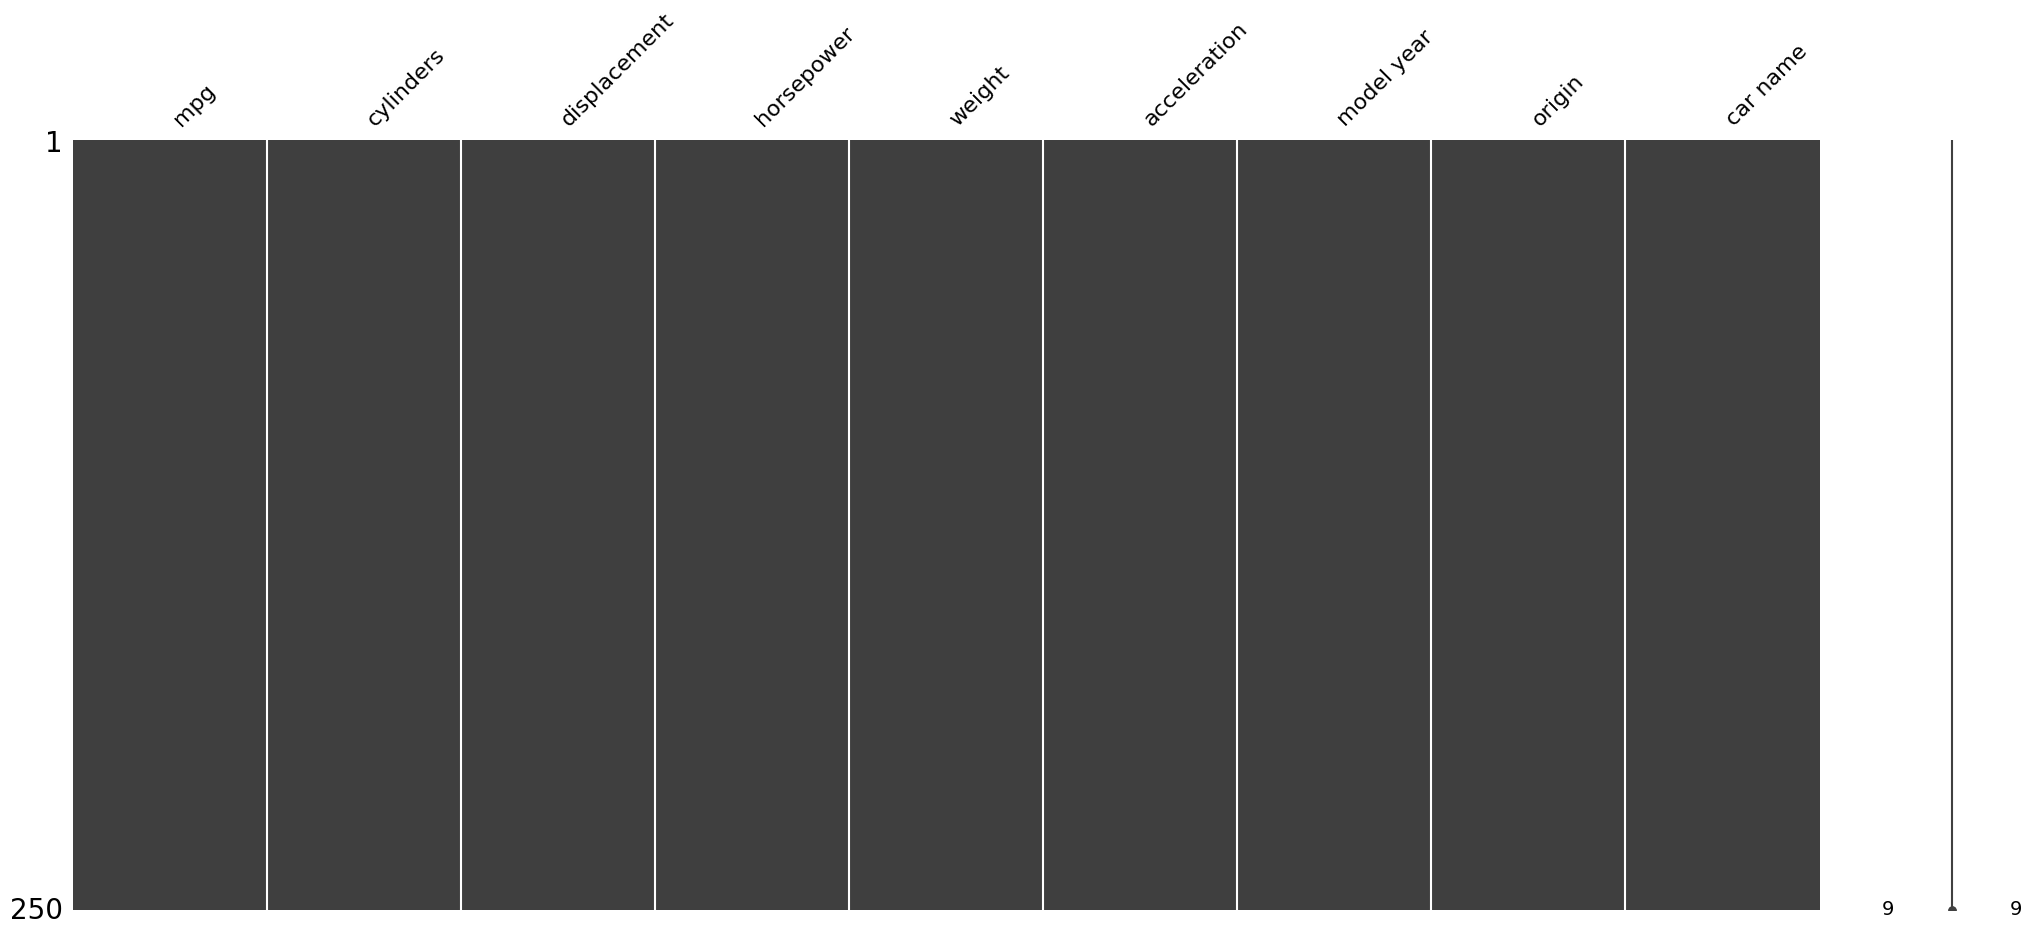

In [11]:
msno.matrix(auto_mpg.sample(250))

It's a small dataset, so curious about everything.

<Axes: >

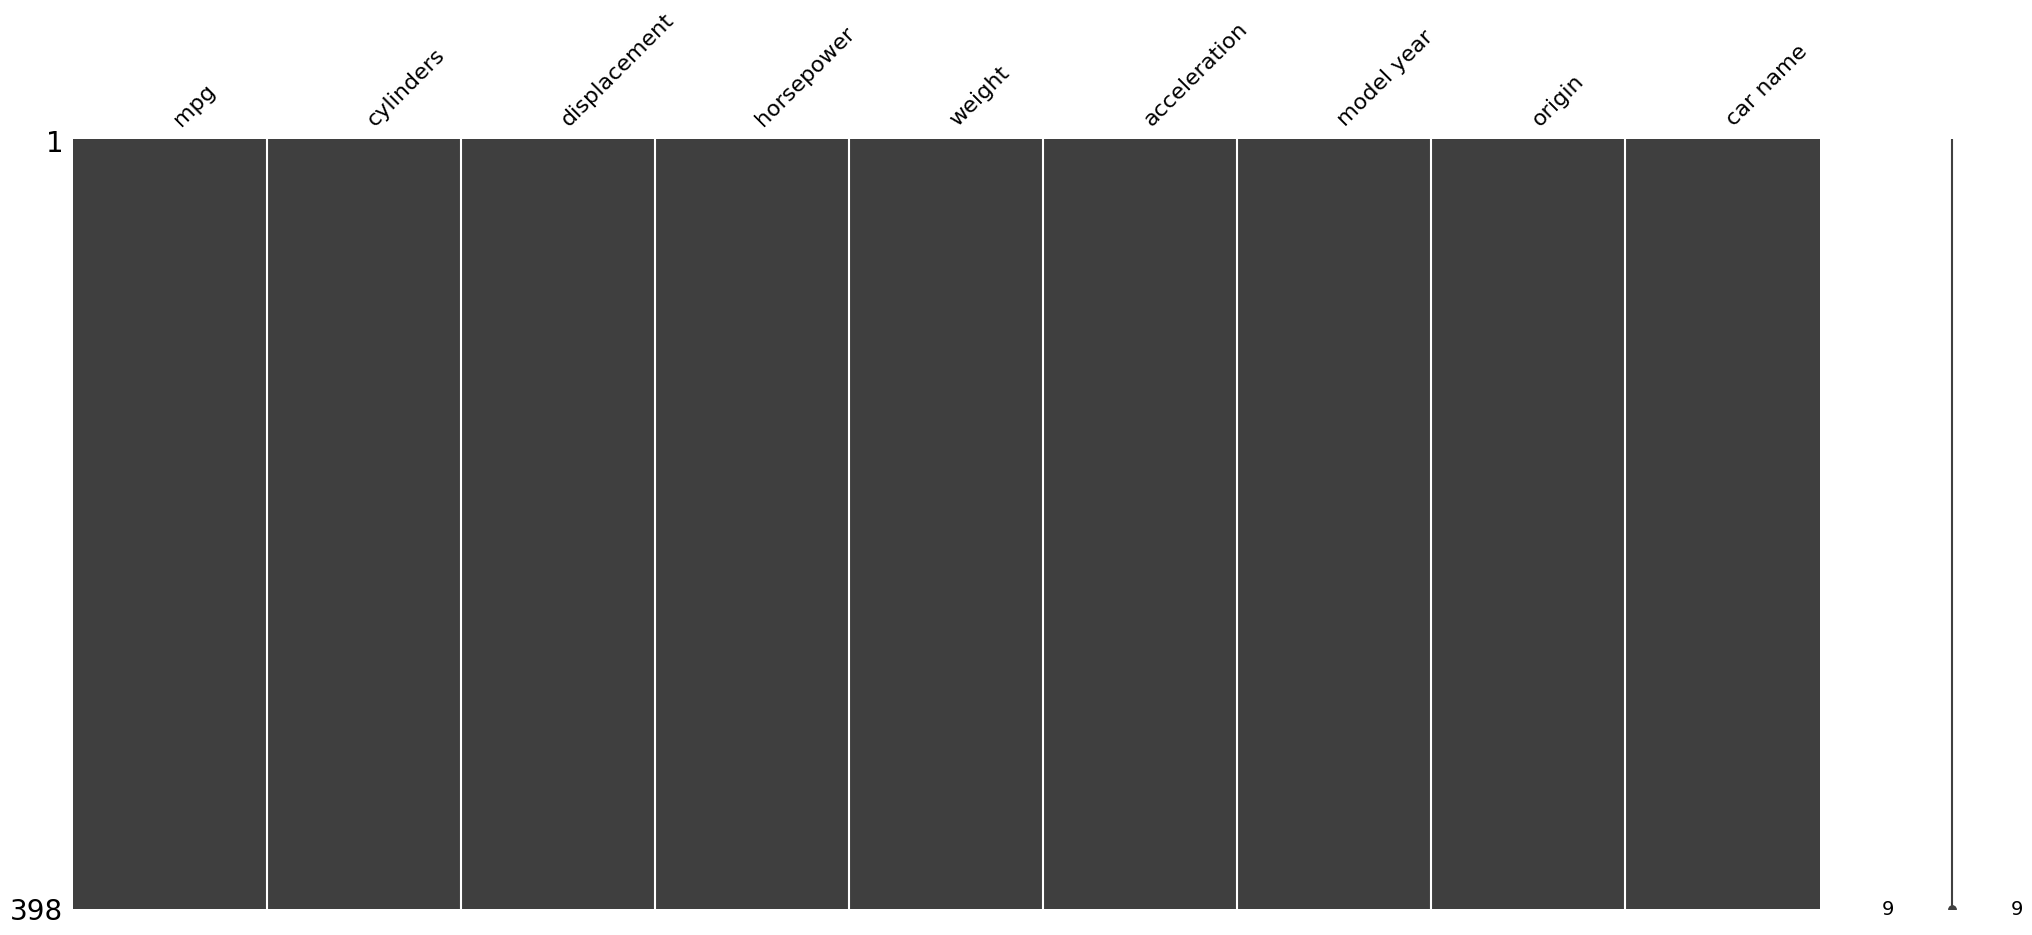

In [12]:
msno.matrix(auto_mpg)

As the matrix looks black, without white missing gaps, I just want to confirm that it's 0, which it is.

In [13]:
total_missing = auto_mpg.isnull().sum().sum()
print(f"Total missing values: {total_missing}")

Total missing values: 0


#### Heatmap

The **missingno** correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another.

However, in this case, as there are no missing values, this will not return a meaningful result. The map will be white. The low and high xlims and ylims being identical mean there are no missing values.

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

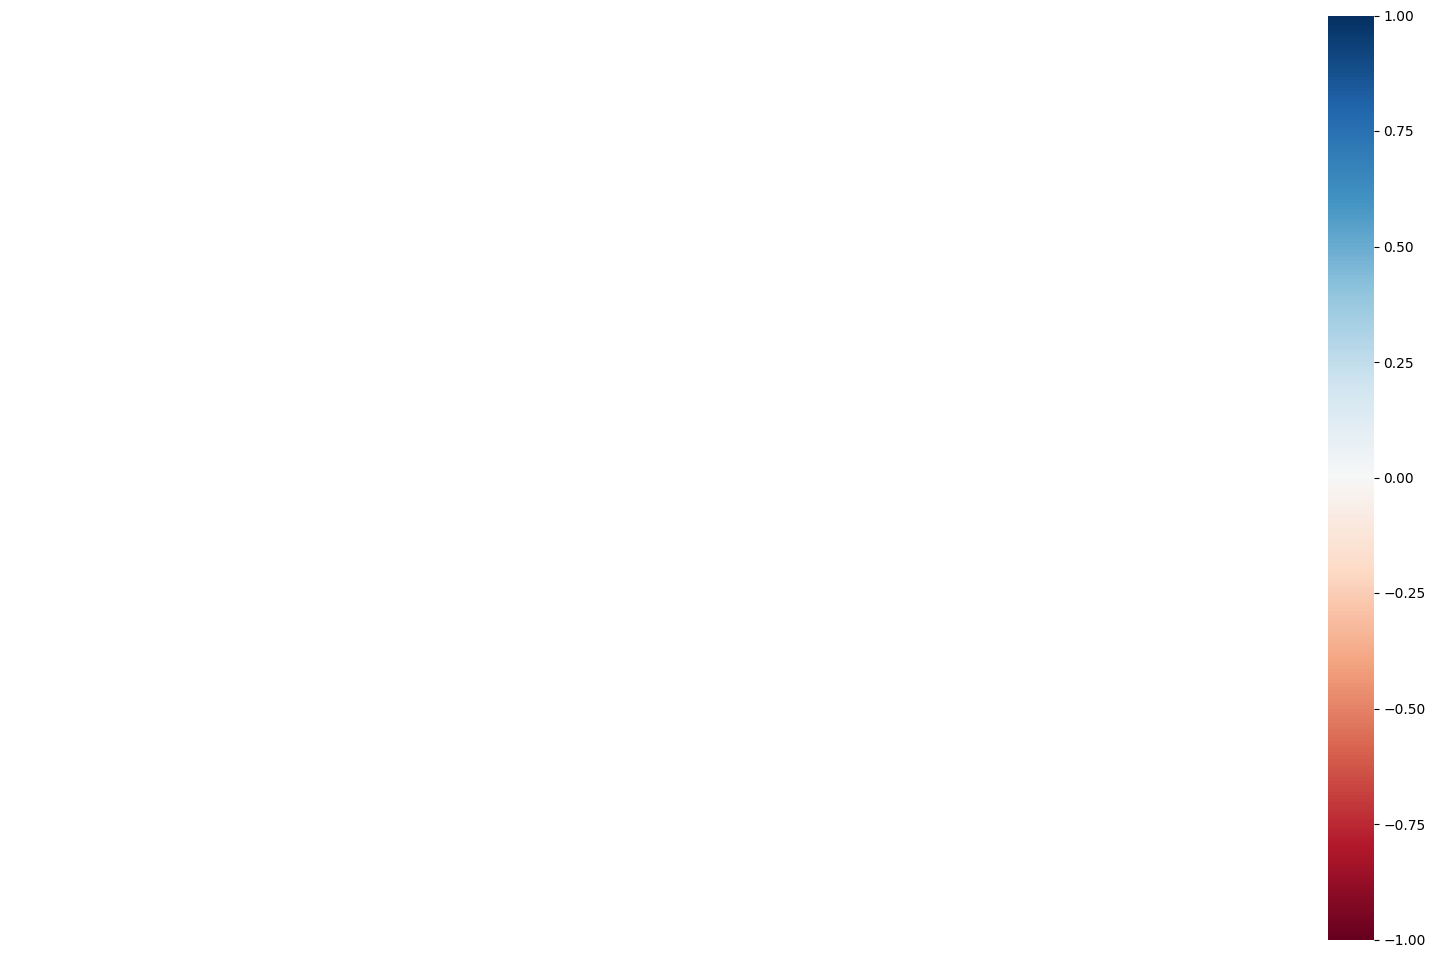

In [14]:
msno.heatmap(auto_mpg)

As this is such a small dataset, removed .sample(1000). Since the objective of this is to show which columns have the most missing values, all columns will be full height as no values are missing. For this dataset, this chart isn't useful.

### Bar chart

<Axes: >

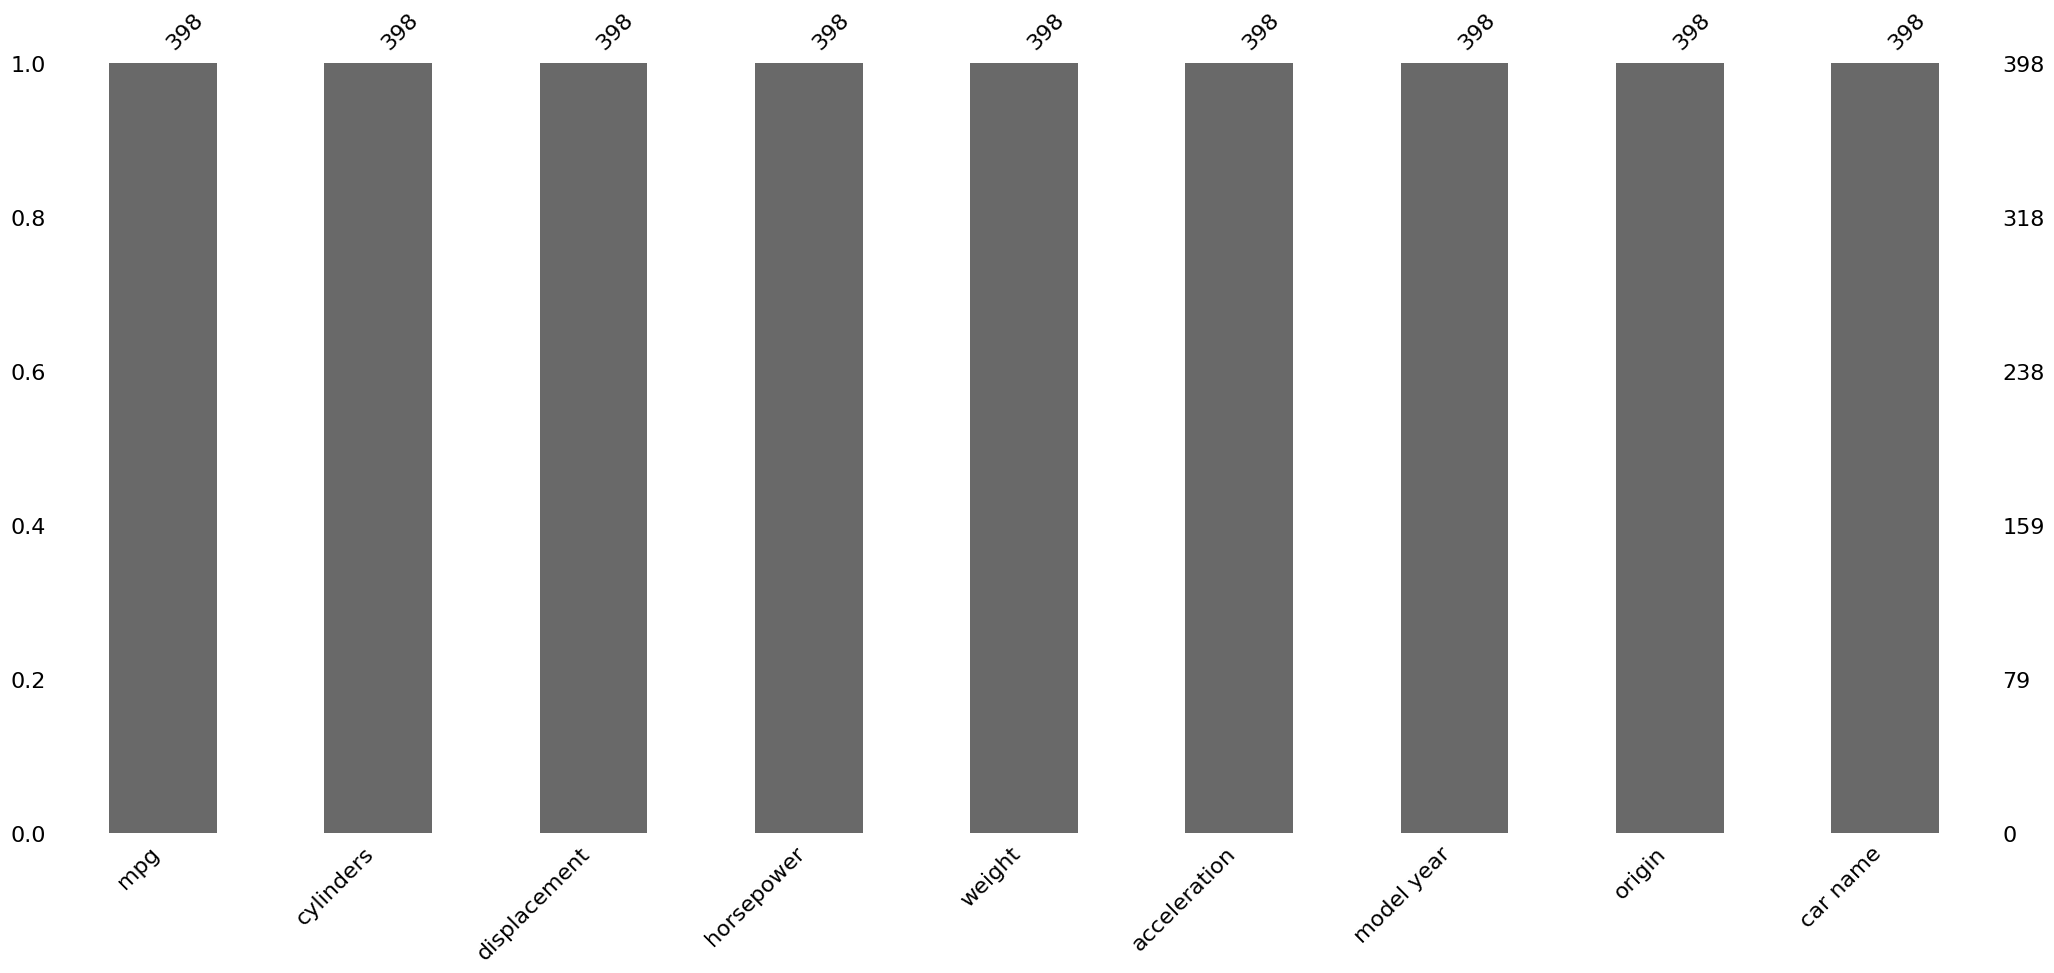

In [15]:
msno.bar(auto_mpg)

#### Dendrogram

For more on missing values (again, not useful for this dataset.) It does need numeric features, however?

The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap:

/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:2821: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


<Axes: >

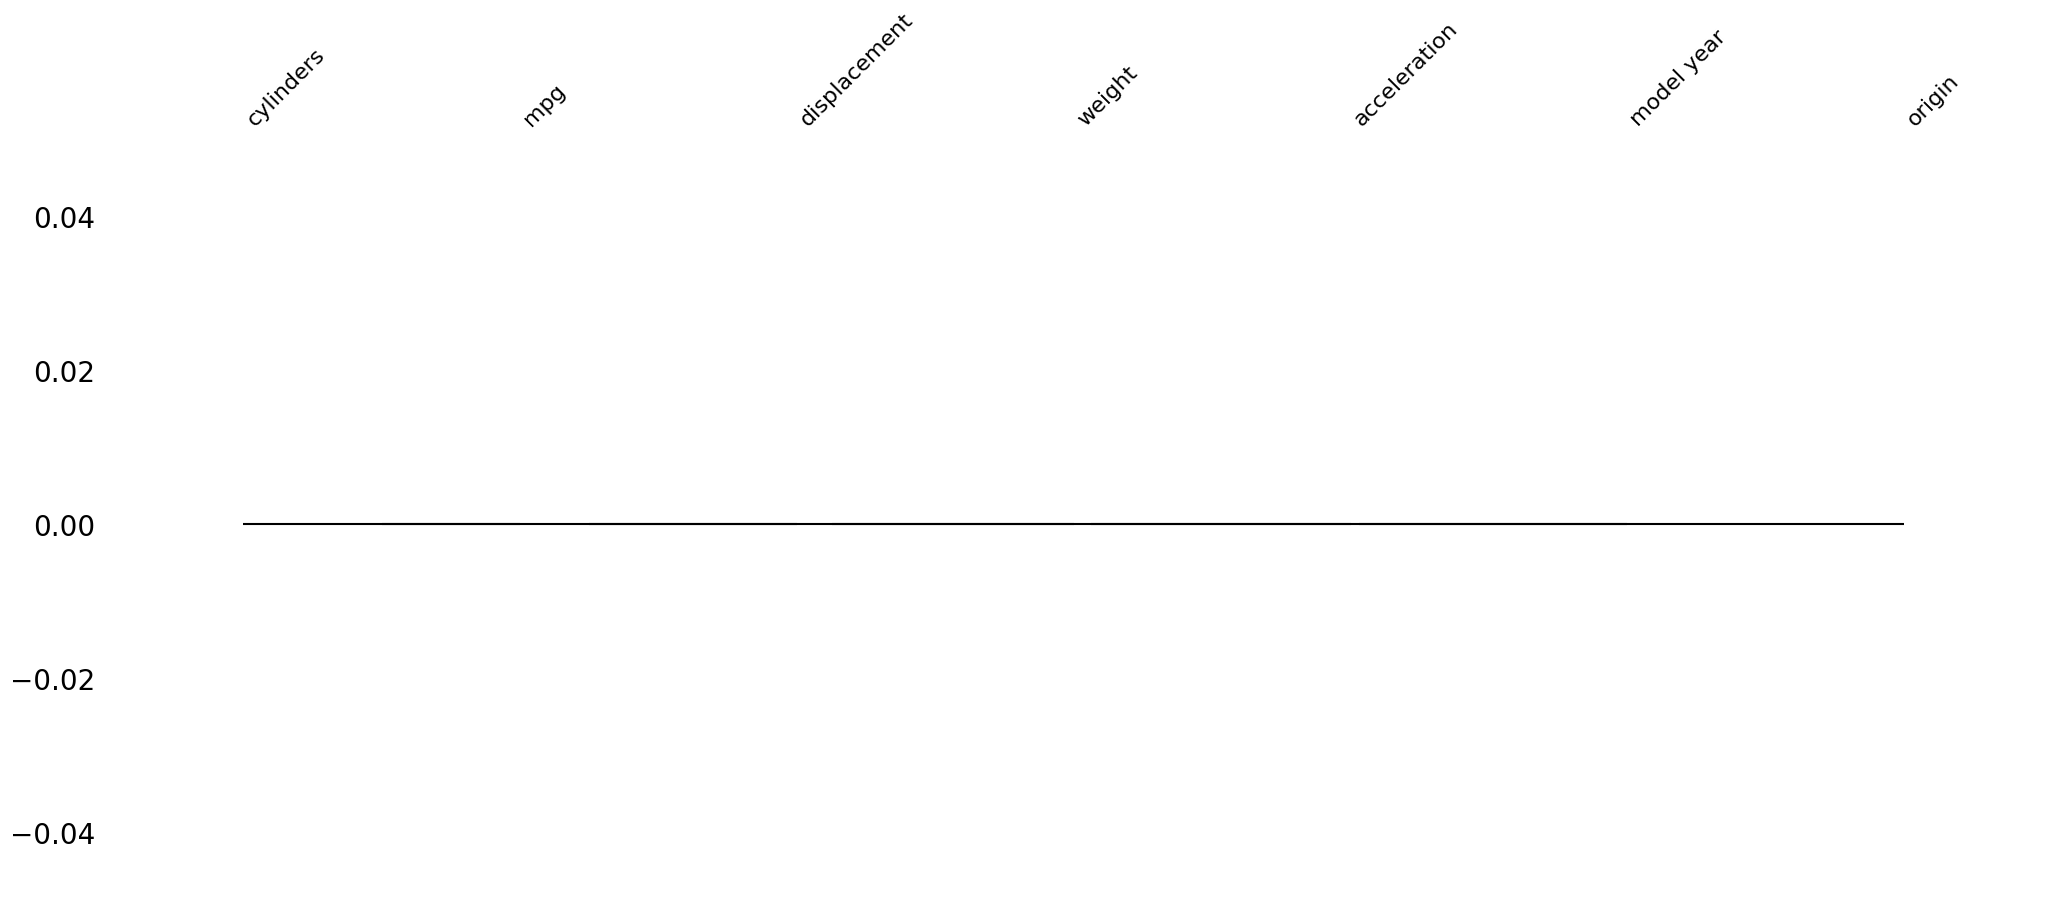

In [16]:
msno.dendrogram(numeric_features)

The dendrogram uses a hierarchical clustering algorithm (courtesy of scipy) to bin variables against one another by their nullity correlation (measured in terms of binary distance). At each step of the tree the variables are split up based on which combination minimizes the distance of the remaining clusters. The more monotone the set of variables, the closer their total distance is to zero, and the closer their average distance (the y-axis) is to zero.

To interpret this graph, read it from a top-down perspective. Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on. In this specific example the dendrogram glues together the variables which are required and therefore present in every record.

Cluster leaves which split close to zero, but not at it, predict one another very well, but still imperfectly. If your own interpretation of the dataset is that these columns actually are or ought to be match each other in nullity , then the height of the cluster leaf tells you, in absolute terms, how often the records are "mismatched" or incorrectly filed—that is, how many values you would have to fill in or drop, if you are so inclined.

As with matrix, only up to 50 labeled columns will comfortably display in this configuration. However the dendrogram more elegantly handles extremely large datasets by simply flipping to a horizontal configuration.

**The Challenges of Your Data**

Now that we have gathered some basic information on your data, it’s a good idea to just go a little bit deeper into the challenges that the data might pose.

There are two factors mostly observed in EDA exercise which are **missing values** and **outliers**
For understanding in detail on how to handle missing values in detail please visit
https://www.kaggle.com/pavansanagapati/simple-tutorial-on-how-to-handle-missing-data
For determining the outliers boxplot is used in the later part of this kernel


## Estimate Skewness and Kurtosis



### Skew

There is one error here about could not convert string to float. This is in the horsepower column which has been described as nominal. I now know why it's nominal because there are a number of question marks (?) in the column. So, I have to use numeric_features for skew instead.

The results:

* mpg: moderate postive, slightly right skewed with long tail on right side.
* cylinders: moderate positve. slightly right skewed.
* displacement: higher postive skew. right skewed. Wider value range.
* weight: moderate positive. slightly right skewed.
* model year: low positive skew, near 0. Symmetrical. Equal cars across years.
* origin: high positive skew. strong right skeaw. Some more common origins.

In [17]:
numeric_features.skew()

,0
mpg,0.457066
cylinders,0.526922
displacement,0.719645
weight,0.531063
acceleration,0.278777
model year,0.011535
origin,0.923776


### Kurtosis

All results of kurt are negative except acceleration.
* acceleration: heavier tail and sharper peak compared to normal.
* mpg, cylinders, displacement, weight, model year and origin: thinner tails and flatter peak compared to normal distribution.
* nothing is close to 0 which would have been similar to normal distribution.

In [ ]:
numeric_features.kurt()

,0
mpg,-0.510781
cylinders,-1.376662
displacement,-0.746597
weight,-0.785529
acceleration,0.419497
model year,-1.181232
origin,-0.817597


<ipython-input-37-56b167070a6f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=False, fit=st.johnsonsu)
<ipython-input-37-56b167070a6f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=False, fit=st.norm)
<ipython-input-37-56b167070a6f>:7: UserWarning: 

`distplot` is a deprecate

<Axes: title={'center': 'Log Normal'}, xlabel='mpg'>

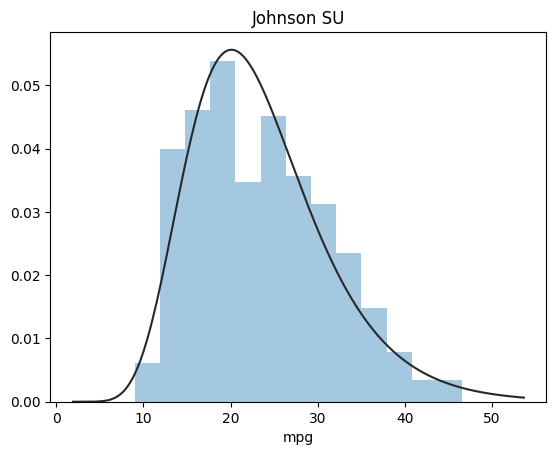

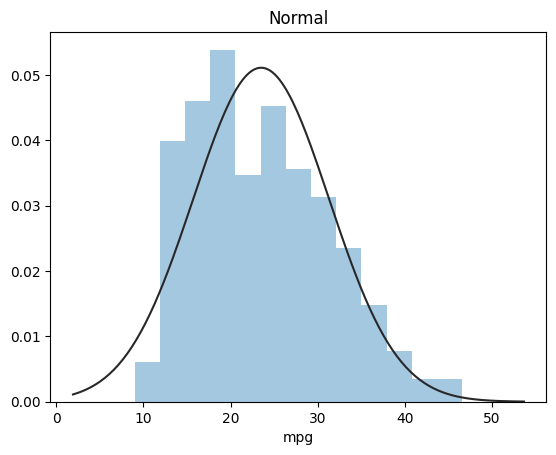

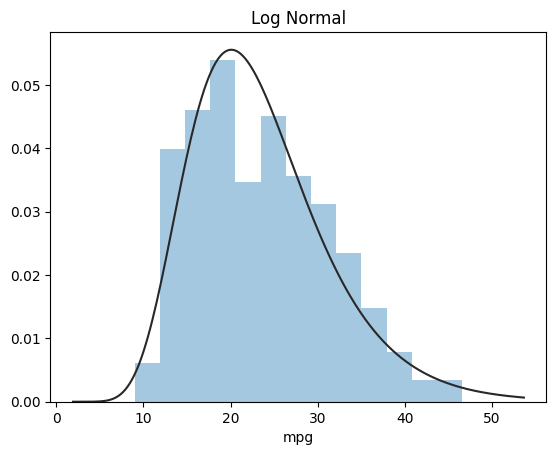

In [ ]:
y = auto_mpg['mpg']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

It is apparent that displacement doesn't follow normal distribution, so before performing regression it has to be transformed. While log transformation does pretty good job, best fit is unbounded Johnson distribution.

<ipython-input-27-fb15bf8bd47c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_features.skew(),color='blue',axlabel ='Skewness')


<Axes: xlabel='Skewness', ylabel='Density'>

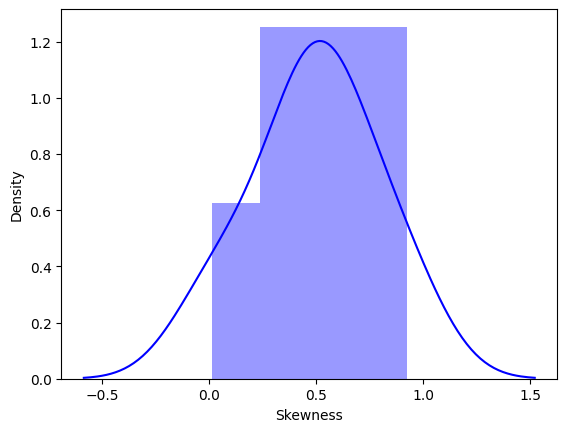

In [ ]:
sns.distplot(numeric_features.skew(),color='blue',axlabel ='Skewness')

<ipython-input-28-d647993cdb84>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_features.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)


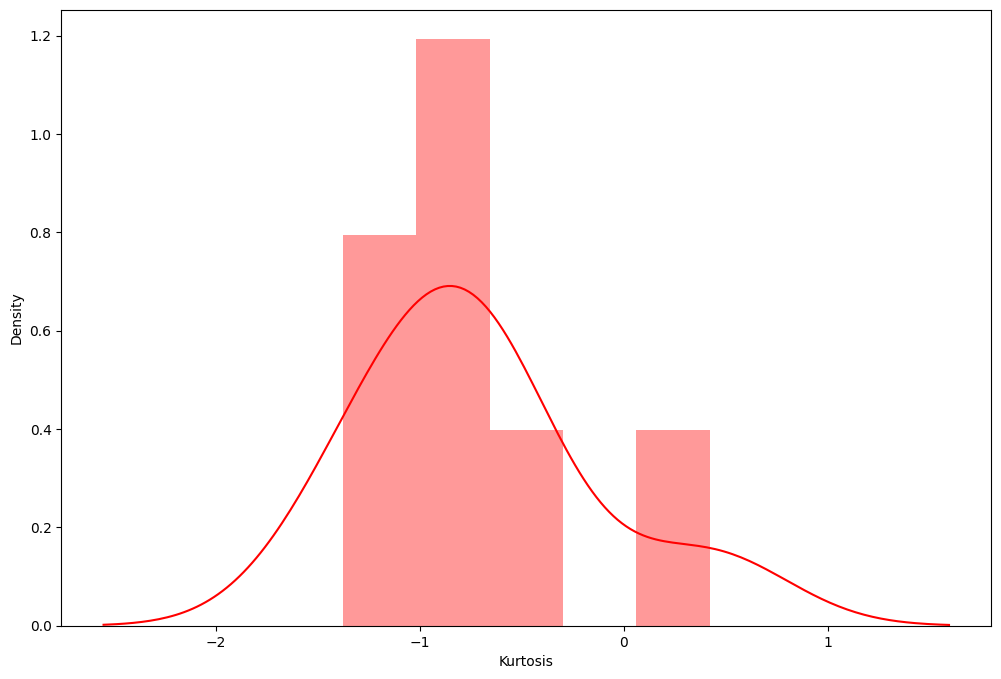

In [ ]:
plt.figure(figsize = (12,8))
sns.distplot(numeric_features.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)
#plt.hist(train.kurt(),orientation = 'vertical',histtype = 'bar',label ='Kurtosis', color ='blue')
plt.show()

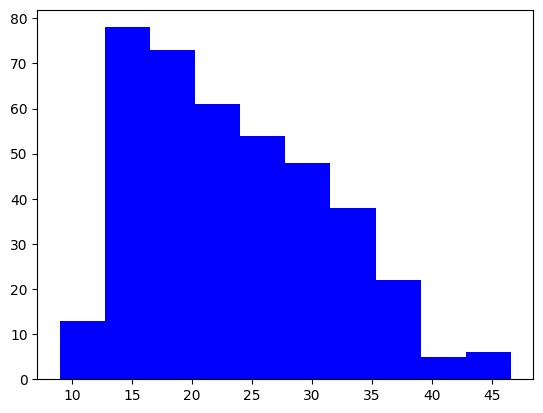

In [ ]:
plt.hist(numeric_features['mpg'],orientation = 'vertical',histtype = 'bar', color ='blue')
plt.show()

(array([ 3., 10., 40., 46., 66., 60., 67., 58., 39.,  9.]),
 array([2.19722458, 2.36166217, 2.52609977, 2.69053737, 2.85497496,
        3.01941256, 3.18385016, 3.34828775, 3.51272535, 3.67716294,
        3.84160054]),
 <BarContainer object of 10 artists>)

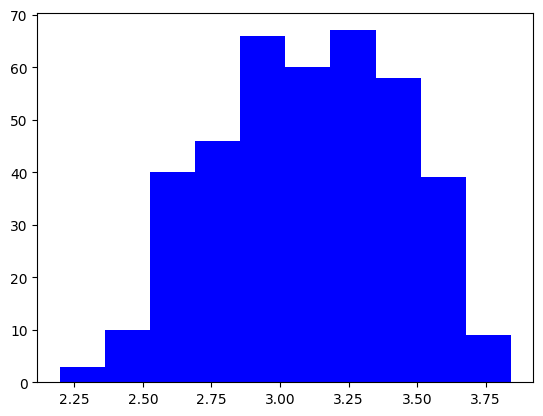

In [ ]:
target = np.log(numeric_features['mpg'])
target.skew()
plt.hist(target,color='blue')

Finding Correlation coefficients between numeric features and mpg

In [ ]:
correlation = numeric_features.corr()
print(correlation['mpg'].sort_values(ascending = False),'\n')

mpg             1.000000
model year      0.579267
origin          0.563450
acceleration    0.420289
cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
Name: mpg, dtype: float64 



To explore further we will start with the following visualisation methods to analyze the data better:

 - Correlation Heat Map
 - Zoomed Heat Map
 - Pair Plot
 - Scatter Plot

### Correlation Heat Map

<Axes: title={'center': 'Correlation of Numeric Features with mpg'}>

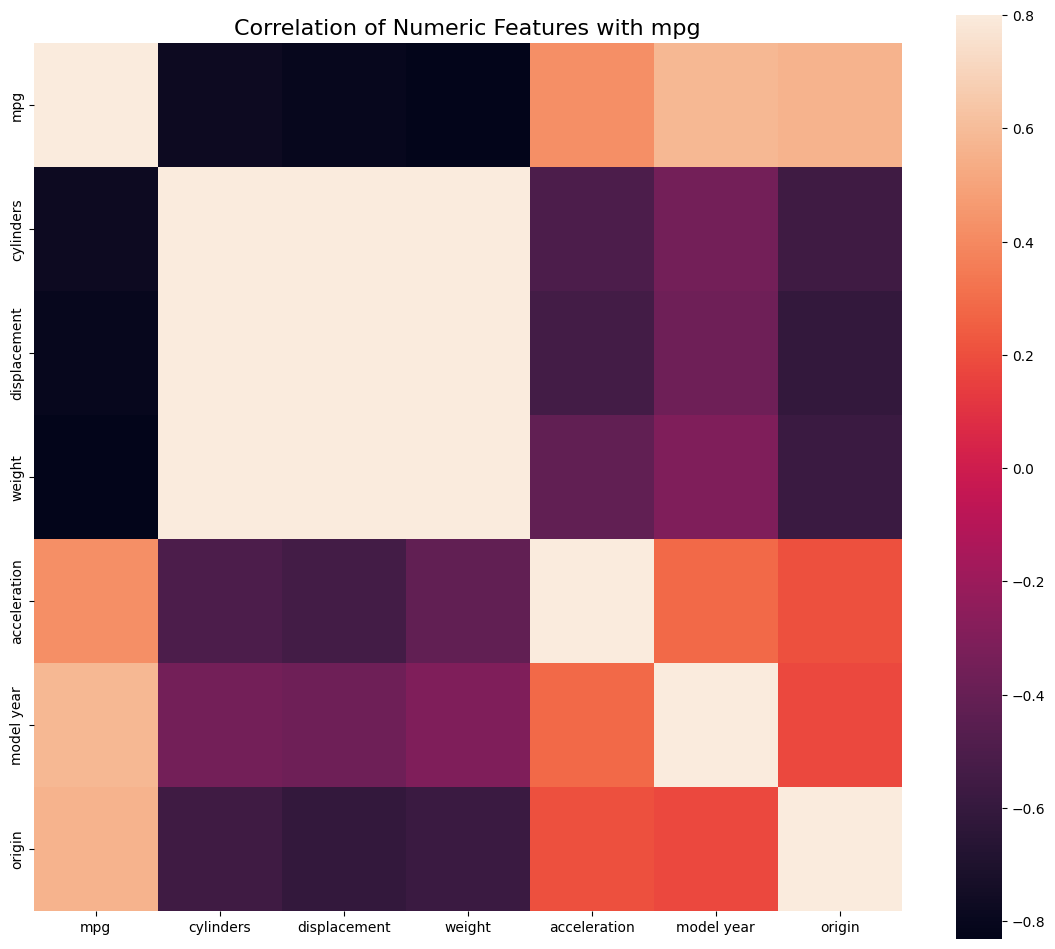

In [ ]:
f , ax = plt.subplots(figsize = (14,12))

plt.title('Correlation of Numeric Features with mpg',y=1,size=16)

sns.heatmap(correlation,square = True,  vmax=0.8)

Apparently, the colours say strength and direction of correlation:
* 0.8 (Light / peach): Strong positive correlation. Variables move together in same direction.
* 0 (Medium / red): Weak or no correlation. No clear pattern.
* -0.8 (Dark / purple): Strong negative correlation. Variables move in opposite direction.

This would indicate for instance, that mpg goes down as weight, displacement and cylinders increase.


The heatmap is the best way to get a quick overview of correlated features thanks to seaborn!

For the other test dataset, not this one, this is what was said:
At initial glance it is observed that there are two red colored squares that get my attention.
1. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables.
2. Second one refers to the 'GarageX' variables.
Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs.

Heatmaps are great to detect this kind of multicollinearity situations and in problems related to feature selection like this project, it comes as an excellent exploratory tool.

Another aspect I observed here is the 'SalePrice' correlations.As it is observed that 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' saying a big 'Hello !' to SalePrice, however we cannot exclude the fact that rest of the features have some level of correlation to the SalePrice. To observe this correlation closer let us see it in Zoomed Heat Map

### Zoomed HeatMap

#### Mpg Correlation matrix

Index(['mpg', 'model year', 'origin', 'acceleration', 'cylinders',
       'displacement', 'weight'],
      dtype='object')


<Axes: >

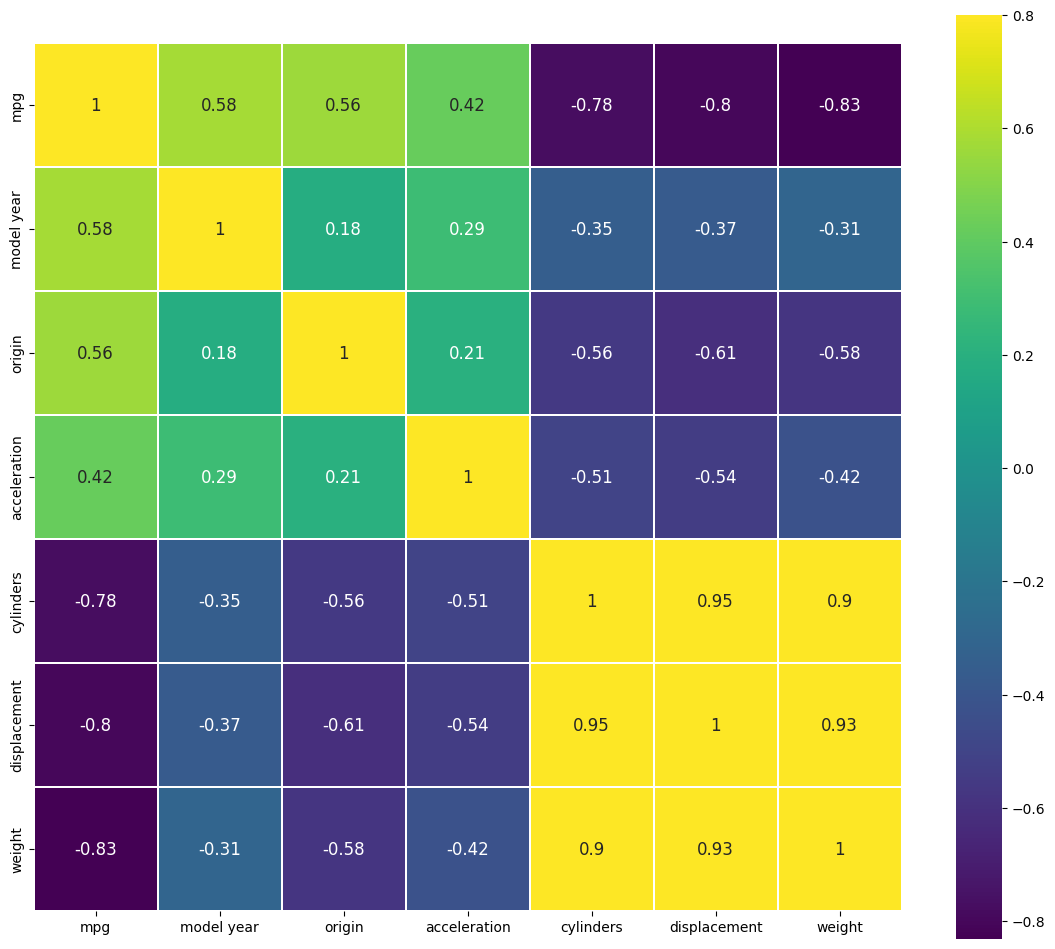

In [ ]:
k= 11
cols = correlation.nlargest(k,'mpg')['mpg'].index
print(cols)
cm = np.corrcoef(numeric_features[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

From above zoomed heatmap it is observed that
* weight, displacement and cylinders are closely negatively correlated with mpg.
* Similarly origin also has a somewhat negative correlation to cylinders, displacement and weight.
* Positive correlation is high between cylinders, weight and displacement.



### Pair Plot

#### Pair Plot between 'SalePrice' and correlated variables

Visualisation of 'OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd' features
with respect to SalePrice in the form of pair plot & scatter pair plot for better understanding.

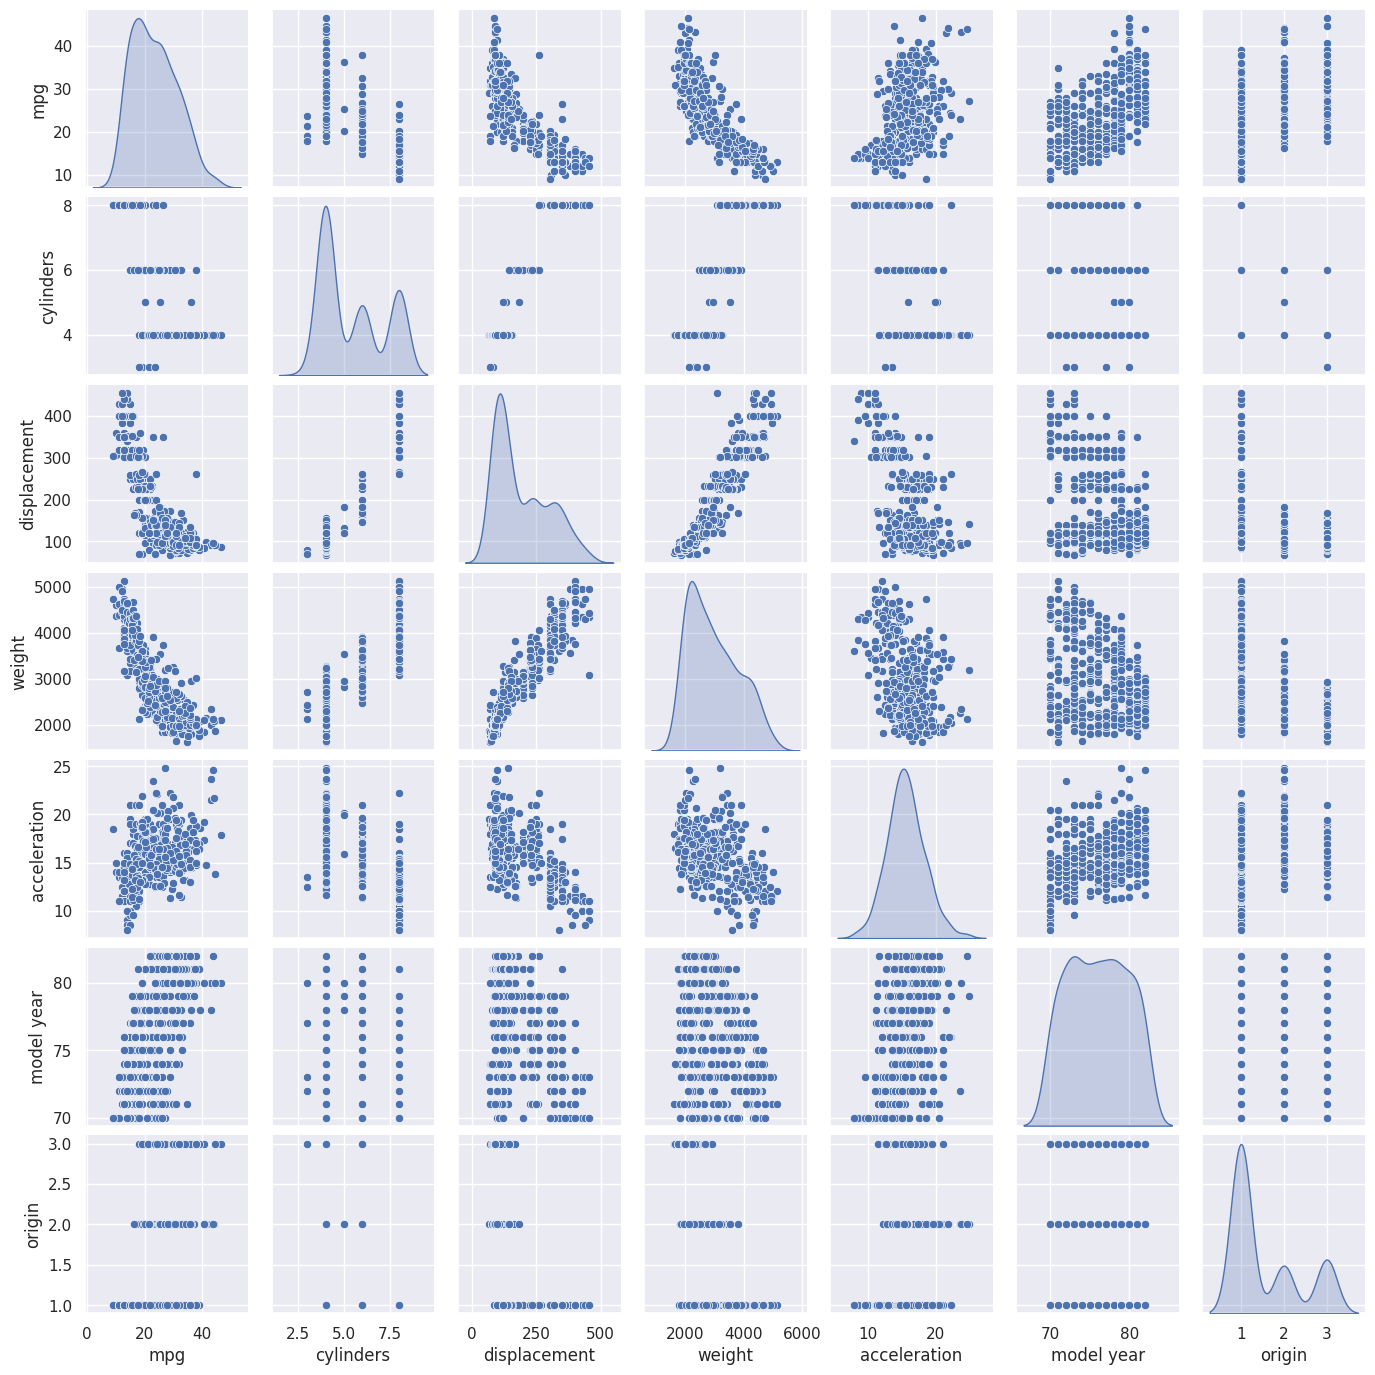

In [ ]:
sns.set()
sns.pairplot(numeric_features, height = 2, kind ='scatter', diag_kind='kde')
plt.show()

It makes sense that origin and cylinders are in lines as they are ordinals (enumerated types). Model year is also more discrete ranging from 70-82. Again displacement, weight and acceleration form clusters with respect to each other and mpg.

### Scatter Plot

#### Scatter plots between the most correlated variables

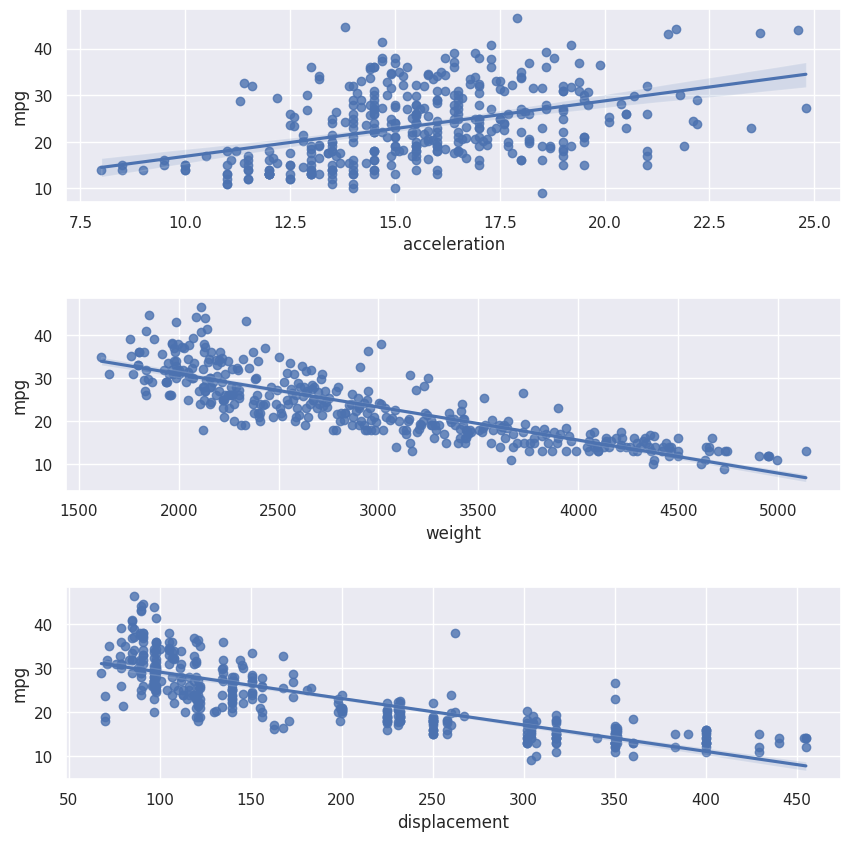

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(10,10))

acceleration_scatter_plot = pd.concat([numeric_features['mpg'],numeric_features['acceleration']],axis = 1)
sns.regplot(x='acceleration',y = 'mpg',data = acceleration_scatter_plot,scatter= True, fit_reg=True, ax=ax1)

weight_scatter_plot = pd.concat([numeric_features['mpg'],numeric_features['weight']],axis = 1)
sns.regplot(x='weight',y = 'mpg',data = weight_scatter_plot,scatter= True, fit_reg=True, ax=ax2)

displacement_scatter_plot = pd.concat([numeric_features['mpg'],numeric_features['displacement']],axis = 1)
sns.regplot(x='displacement',y = 'mpg',data = displacement_scatter_plot,scatter= True, fit_reg=True, ax=ax3)

plt.subplots_adjust(hspace=0.5) # Adjust hspace for vertical spacing

<ipython-input-54-ec910865979c>:1: FutureWarning: The provided callable <function median at 0x7b9983410700> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  mpg_acceleration= numeric_features.pivot_table(index ='acceleration',values = 'mpg', aggfunc = np.median)


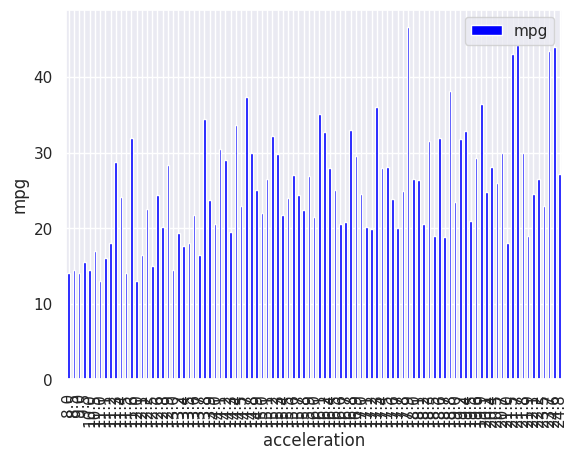

In [ ]:
mpg_acceleration= numeric_features.pivot_table(index ='acceleration',values = 'mpg', aggfunc = np.median)
mpg_acceleration.plot(kind = 'bar',color = 'blue')
plt.xlabel('acceleration')
plt.ylabel('mpg')
plt.show()

#### Box plot - acceleration

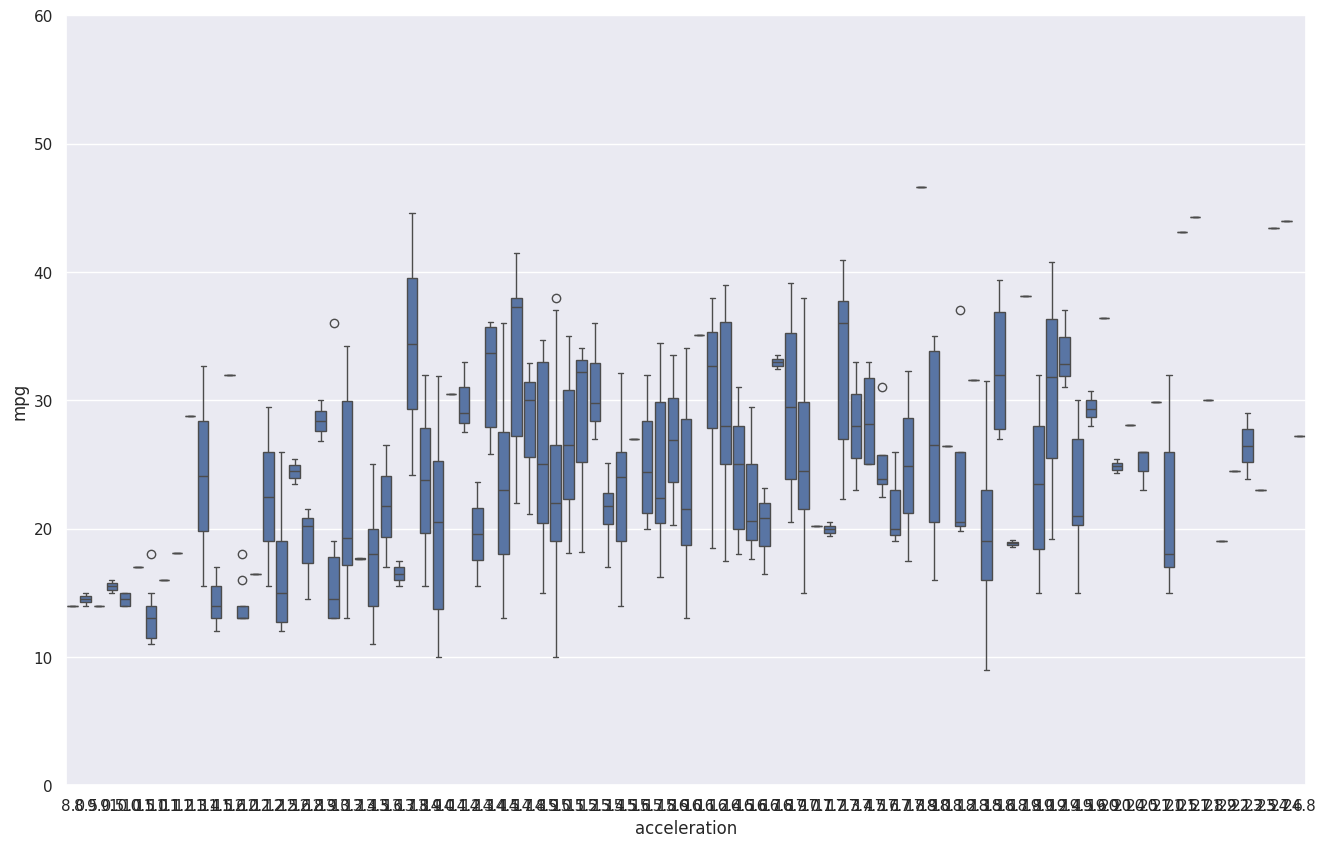

In [ ]:
var = 'acceleration'
data = pd.concat([numeric_features['mpg'], numeric_features[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x=var, y="mpg", data=data)
fig.axis(ymin=0, ymax=60);

#### Box plot - weight

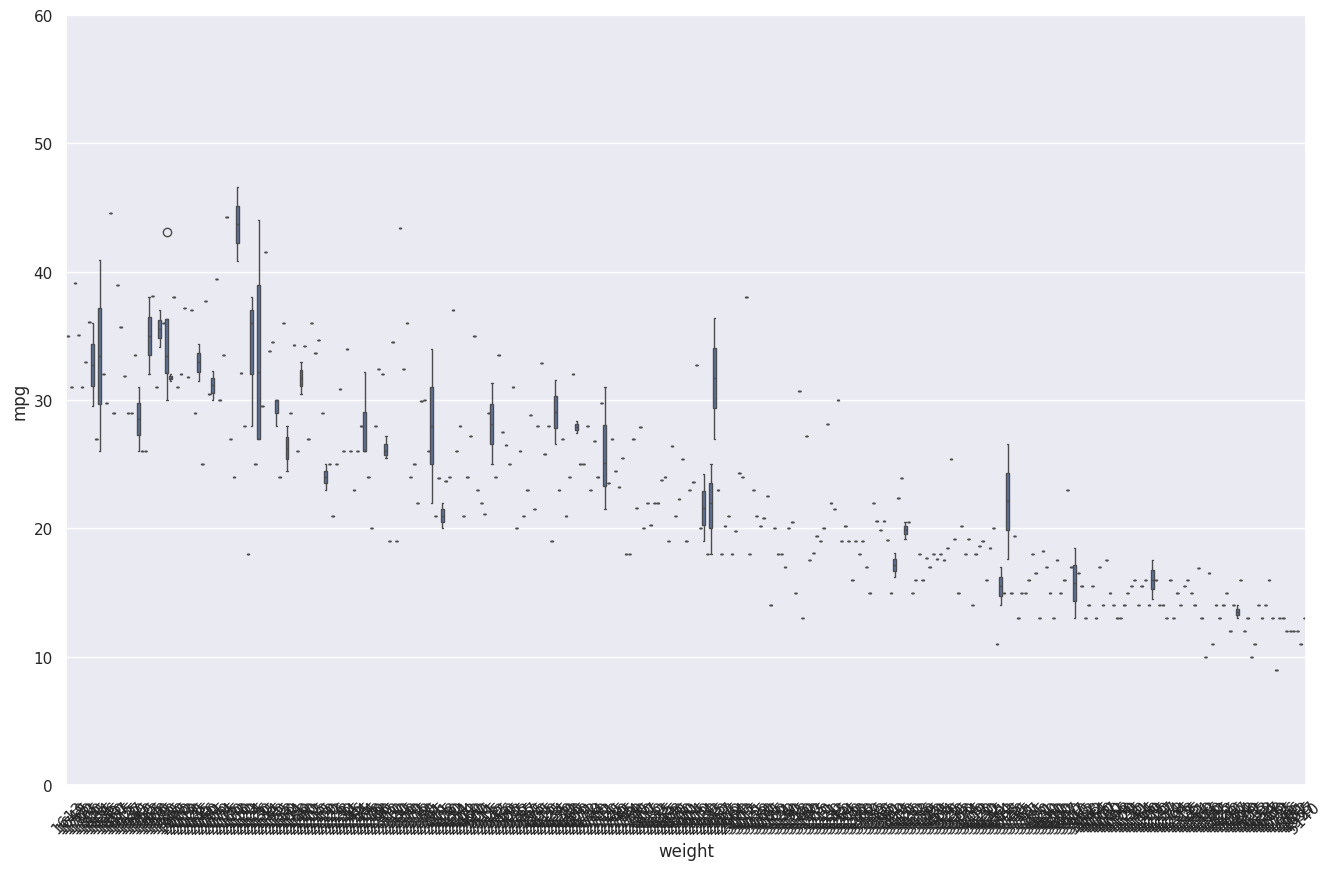

In [ ]:
var = 'weight'
data = pd.concat([numeric_features['mpg'], numeric_features[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x=var, y="mpg", data=data)
fig.axis(ymin=0, ymax=60);
xt = plt.xticks(rotation=45)

####Box plot - displacement

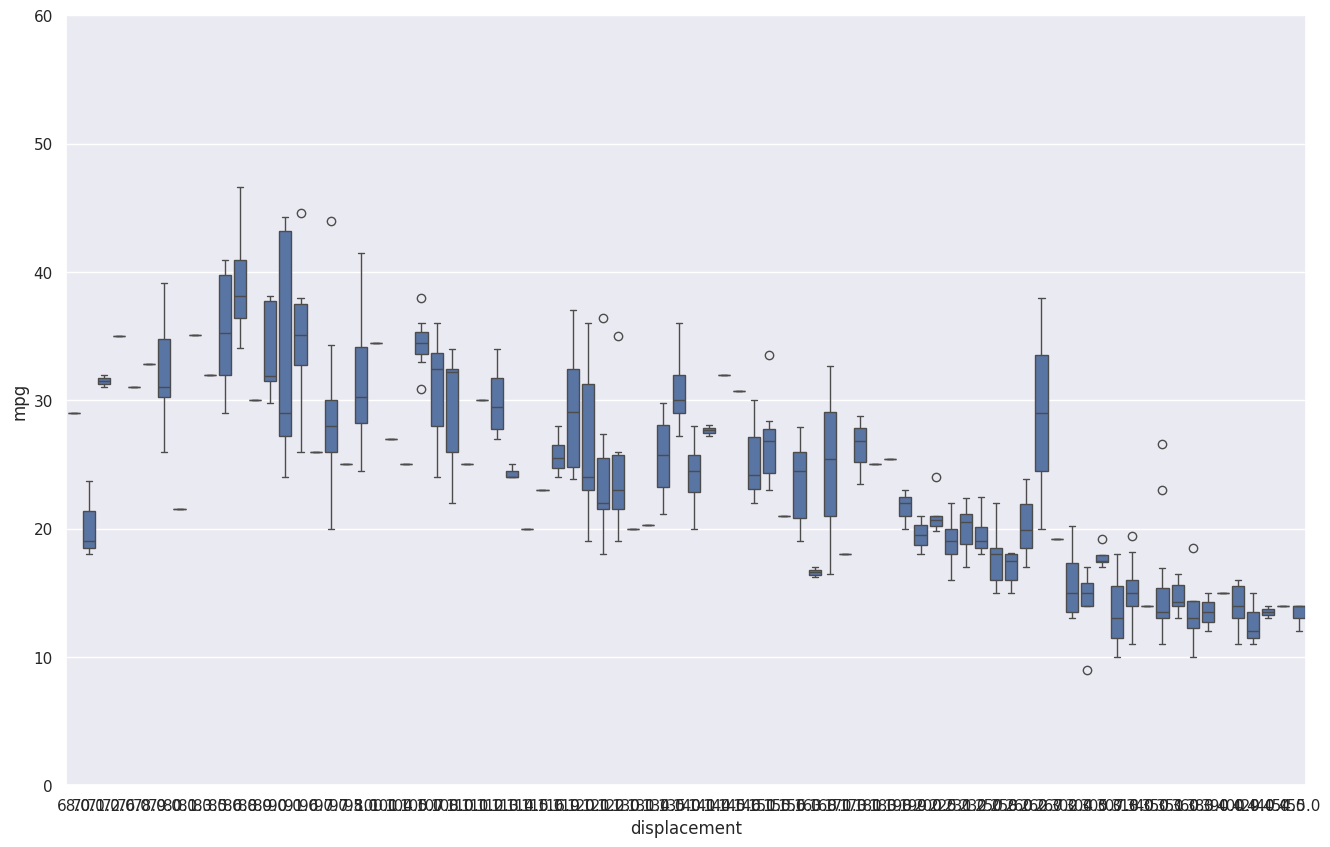

In [ ]:
var = 'displacement'
data = pd.concat([numeric_features['mpg'], numeric_features[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x=var, y="mpg", data=data)
fig.axis(ymin=0, ymax=60);

#### Count Plot - displacement

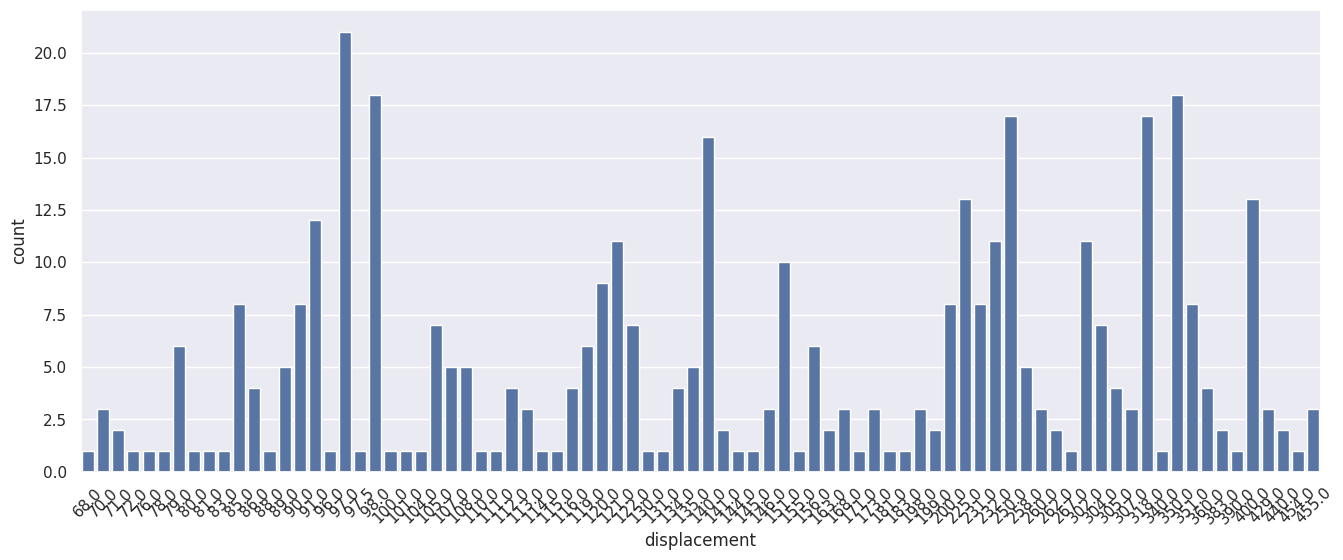

In [ ]:
plt.figure(figsize = (16, 6))
sns.countplot(x = 'displacement', data = numeric_features)
xt = plt.xticks(rotation=45)

Based on the above observation can group those displacements with similar mpg into a same bucket for dimension-reduction. Let us see this in the preprocessing stage.

#### Qualitative / Categorical

With qualitative variables we can check distribution of mpg with respect to variable values and enumerate them.

I need to first convert horsepower to a numerical feature.

df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

That code above will do the conversion and set non-numeric values (i.e. the '?') to NaN.

But 'car name' doesn't look to be missing values or have question marks. Also, I think every car name is different. So, enumerating with respect to that does not make sense.

In [ ]:
auto_mpg['horsepower'] = pd.to_numeric(auto_mpg['horsepower'], errors='coerce')

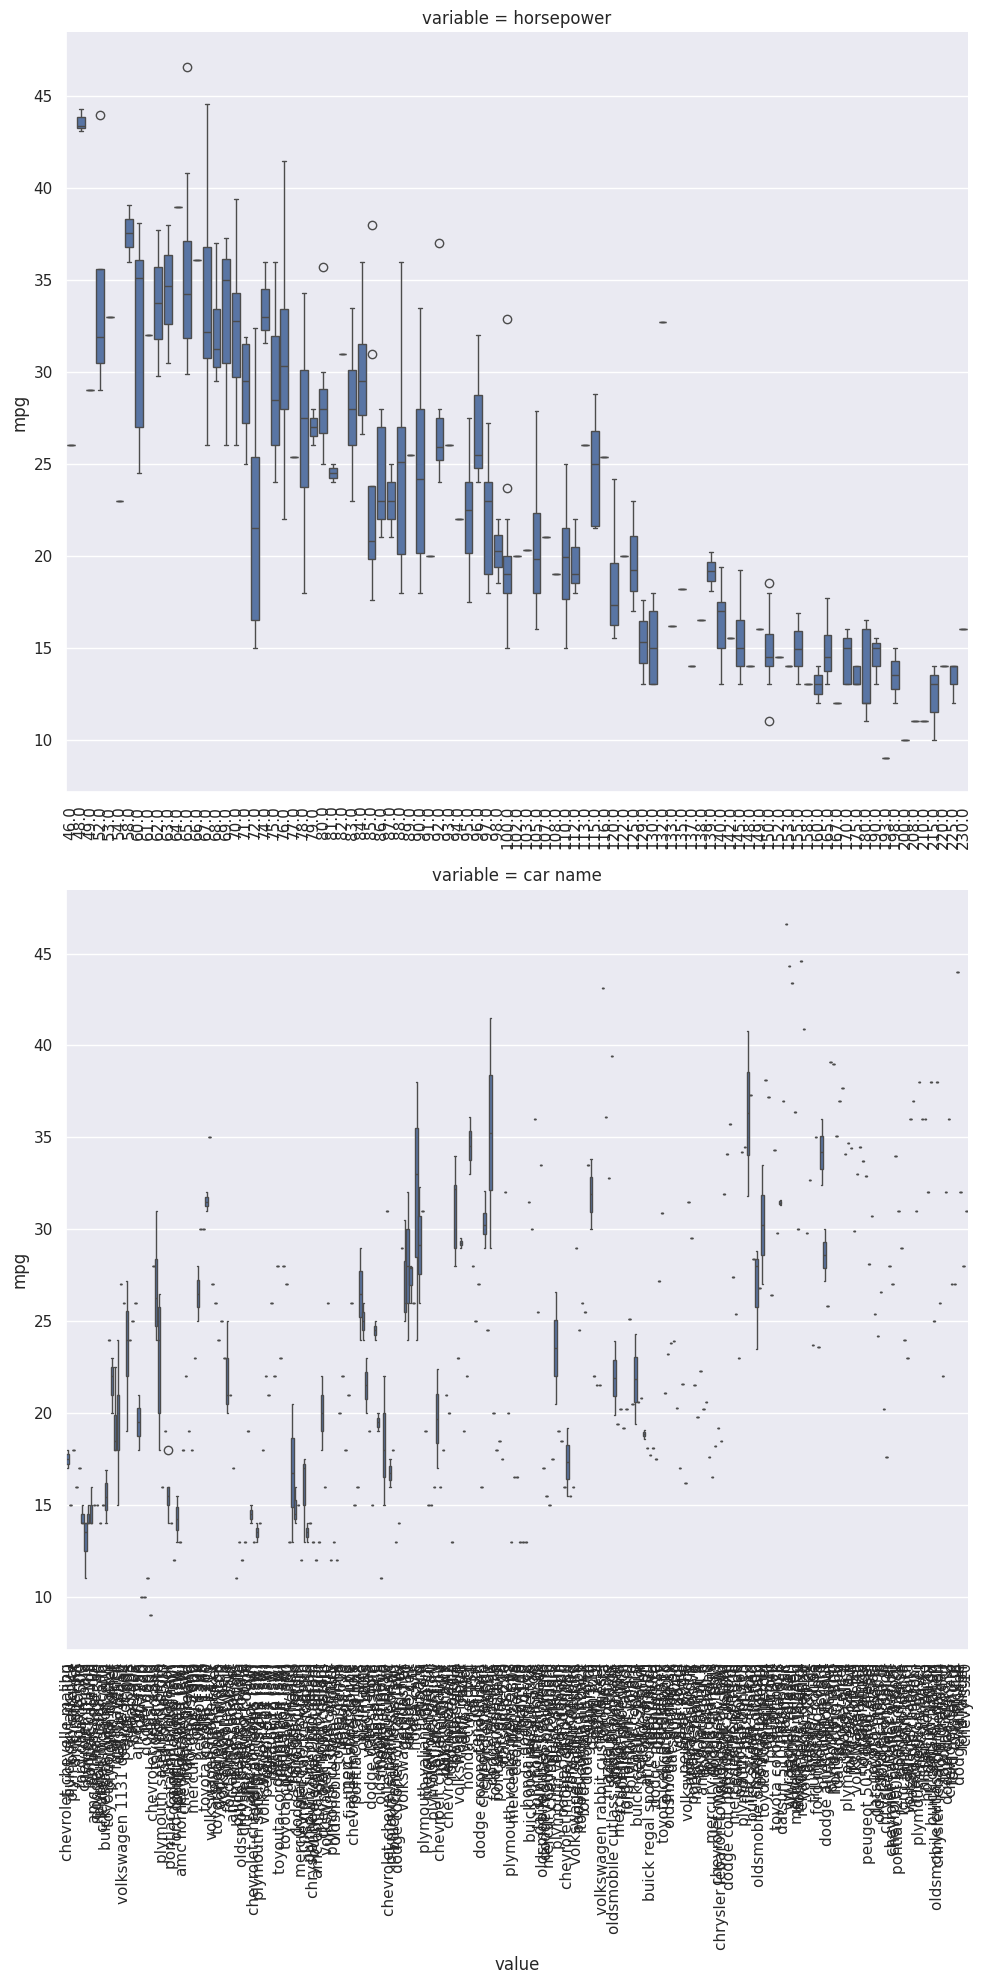

In [ ]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(auto_mpg, id_vars=['mpg'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=1, sharex=False, sharey=False, height=10)
g = g.map(boxplot, "value", "mpg")

#### ViolinPlot - Functional vs.SalePrice

In [1]:
sns.violinplot('horsepower', 'mpg', data = auto_mpg)

NameError: name 'sns' is not defined

#### FactorPlot - FirePlaceQC vs. SalePrice

In [ ]:
sns.factorplot('FireplaceQu', 'SalePrice', data = train, color = 'm', \
               estimator = np.median, order = ['Ex', 'Gd', 'TA', 'Fa', 'Po'], size = 4.5,  aspect=1.35)

#### Facet Grid Plot - FirePlace QC vs.SalePrice

In [ ]:
g = sns.FacetGrid(train, col = 'FireplaceQu', col_wrap = 3, col_order=['Ex', 'Gd', 'TA', 'Fa', 'Po'])
g.map(sns.boxplot, 'Fireplaces', 'SalePrice', order = [1, 2, 3], palette = 'Set2')

#### PointPlot

In [ ]:
plt.figure(figsize=(8,10))
g1 = sns.pointplot(x='Neighborhood', y='SalePrice',
                   data=train, hue='LotShape')
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1.set_title("Lotshape Based on Neighborhood", fontsize=15)
g1.set_xlabel("Neighborhood")
g1.set_ylabel("Sale Price", fontsize=12)
plt.show()

 ### Missing Value Analysis

 #### Numeric Features

In [ ]:
total = numeric_features.isnull().sum().sort_values(ascending=False)
percent = (numeric_features.isnull().sum()/numeric_features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', '% of Total Observations'])
missing_data.index.name =' Numeric Feature'

missing_data.head(20)

#### Missing values for all numeric features in Bar chart Representation

In [ ]:
missing_values = numeric_features.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')

ind = np.arange(missing_values.shape[0])
width = 0.1
fig, ax = plt.subplots(figsize=(12,3))
rects = ax.barh(ind, missing_values.missing_count.values, color='b')
ax.set_yticks(ind)
ax.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Observations Count - Numeric Features")
plt.show()


#### Categorical Features

In [ ]:
total = categorical_features.isnull().sum().sort_values(ascending=False)
percent = (categorical_features.isnull().sum()/categorical_features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', ' % of Total Observations'])
missing_data.index.name ='Feature'
missing_data.head(20)

#### Missing values for  Categorical features in Bar chart Representation

In [ ]:
missing_values = categorical_features.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')

ind = np.arange(missing_values.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_values.missing_count.values, color='red')
ax.set_yticks(ind)
ax.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Observations Count - Categorical Features")
plt.show()

### Categorical Feature Exploration

In [ ]:
for column_name in train.columns:
    if train[column_name].dtypes == 'object':
        train[column_name] = train[column_name].fillna(train[column_name].mode().iloc[0])
        unique_category = len(train[column_name].unique())
        print("Feature '{column_name}' has '{unique_category}' unique categories".format(column_name = column_name,
                                                                                         unique_category=unique_category))

for column_name in test.columns:
    if test[column_name].dtypes == 'object':
        test[column_name] = test[column_name].fillna(test[column_name].mode().iloc[0])
        unique_category = len(test[column_name].unique())
        print("Features in test set '{column_name}' has '{unique_category}' unique categories".format(column_name = column_name, unique_category=unique_category))